# Decision Trees 

## 1. Collect the Data

In [19]:
## Importing Libraries
import warnings
warnings.filterwarnings('ignore') #remove warnings


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("loan.csv")
df

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No
5,18,15,No
6,28,20,No
7,12,21,Yes
8,24,22,Yes
9,9,30,Yes


## 2. Explore the Data

In [21]:
df.isnull().sum()

Income         0
Loan Amount    0
Default        0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [23]:
df.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


<AxesSubplot:xlabel='Default', ylabel='Income'>

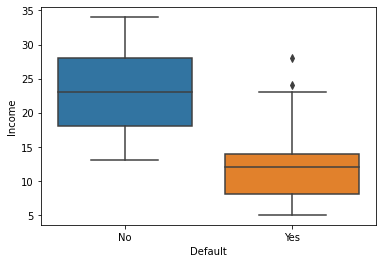

In [24]:
sns.boxplot(data = df, x = 'Default', y = 'Income')

<AxesSubplot:xlabel='Default', ylabel='Loan Amount'>

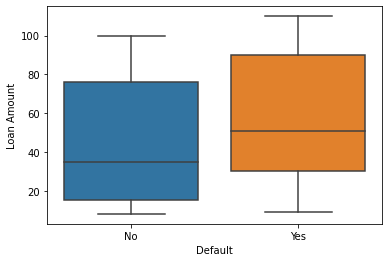

In [25]:
sns.boxplot(data = df, x = 'Default', y = 'Loan Amount')

<AxesSubplot:>

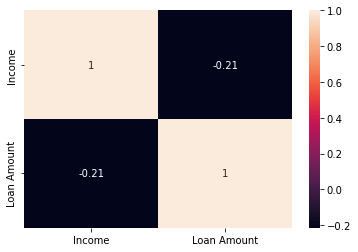

In [26]:
sns.heatmap(df.corr(),annot=True) 

## 3. Prepare the Data

In [27]:
df['Default']=pd.factorize(df['Default'])[0]

<AxesSubplot:>

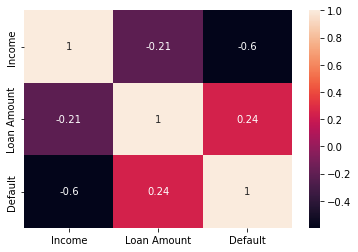

In [29]:
sns.heatmap(df.corr(),annot=True) 

In [30]:
X = df[['Income','Loan Amount']]
y = df[['Default']]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 1234) 

In [32]:
X_train.shape, X_test.shape

((22, 2), (8, 2))

## 4. Train and Evaluate the Classification Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 12)

In [43]:
model = classifier.fit(X_train, y_train)

In [44]:
model.score(X_test, y_test)

0.75

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

## 5. Visualize the Classification Tree

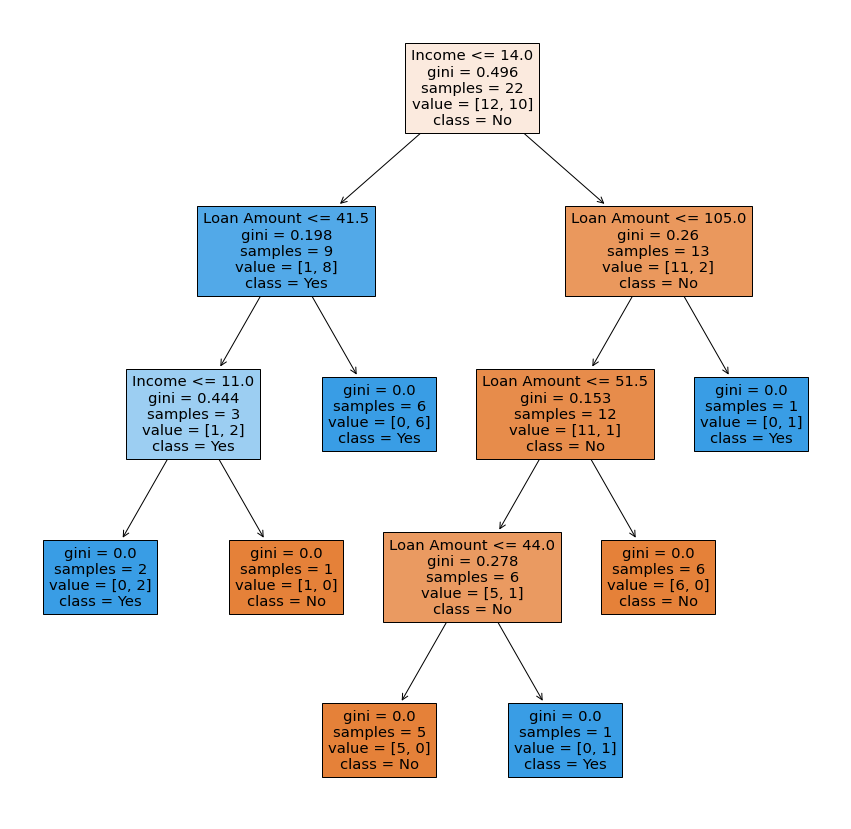

In [46]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, feature_names= list(X.columns), class_names=['No','Yes'],filled=True);